<a href="https://colab.research.google.com/github/janimiyarj/Project1/blob/main/Sentiment_Analysis_of_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SENTIMENT ANALYSIS OF MOVIE REVIEWS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset
df =  pd.read_csv('/content/train.tsv.zip', sep = '\t')
# displaying first 10 rows of dataset
df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [ ]:
# Checking for missing values in the dataset
print(df.shape)
df.isnull().sum()

(156060, 4)


PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
# Mapping numerical sentiment labels to human-defined sentiment phrases
Sentiment_phrase =[]

for row in df['Sentiment']:
    if row == 0:
        Sentiment_phrase.append('negative')
    elif row == 1:
        Sentiment_phrase.append('somewhat negative')
    elif row == 2:
        Sentiment_phrase.append('neutral')
    elif row == 3:
        Sentiment_phrase.append('somewhat positive')
    elif row == 4:
        Sentiment_phrase.append('positive')
    else:
        Sentiment_phrase.append('Failed')

# Adding a new column with the sentiment phrases
df['Sentiment_phrase'] = Sentiment_phrase


In [ ]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_phrase
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neutral
2,3,1,A series,2,neutral
3,4,1,A,2,neutral
4,5,1,series,2,neutral


In [ ]:
# displaying the count of each sentiment label
df['Sentiment'].value_counts()


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
senti_phrase_count = pd.value_counts(df['Sentiment_phrase'].values)
senti_phrase_count

neutral              79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
dtype: int64

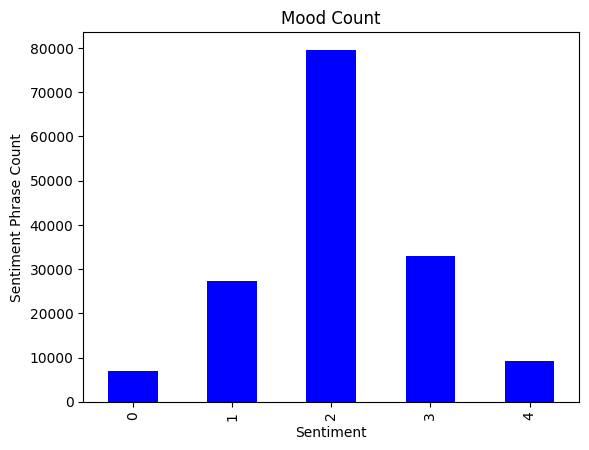

In [ ]:
# plotting a bar chart
df['Sentiment'].value_counts().sort_index().plot(kind='bar', color= 'blue')
plt.ylabel('Sentiment Phrase Count')
plt.xlabel('Sentiment')
plt.title('Mood Count');


In [ ]:
# calculating and displaying words counts statistics
word_counts = df['Phrase'].apply(lambda x: len(x.split()))
print(word_counts.describe())
print(df['Sentiment'].value_counts(normalize=True).sort_index())


count    156060.000000
mean          7.203364
std           7.024604
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max          52.000000
Name: Phrase, dtype: float64
0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


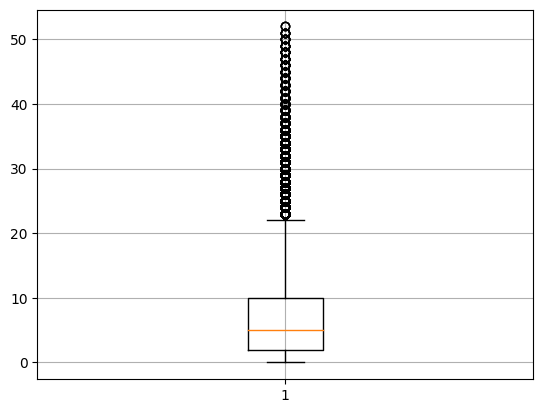

In [ ]:
# boxplot
plt.boxplot(word_counts.values)
plt.grid(True)
plt.show()
#Most of the reviews have words between 5 to 10

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize #tokenizing strings
from nltk.stem import WordNetLemmatizer #reduces to its root form
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Setting up NLTK components for text processing
stemmer  = SnowballStemmer(language='english') #setup for english language
stop_words = stopwords.words('english')
stop_words.extend(['film','movie'])
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies reviews
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function for preprocessing text data
def data_preprocess(Phrase):

    """
    Preprocesses a given movie review phrase.

    Parameters:
    - Phrase (str): The input movie review phrase.

    Returns:
    - str: The preprocessed movie review phrase.
    """
    Phrase = re.sub(re.compile('<.*?>'), '', Phrase) #removing html tags if any
    Phrase =  re.sub('[^A-Za-z0-9]+', ' ', Phrase) #taking only words
    Phrase = Phrase.lower()   # making all phrases lower case
    tokens = nltk.word_tokenize(Phrase) # converts Phrases to token
    Phrase = [word for word in tokens if word not in stop_words] #removing stop words
    Phrase = [lemmatizer.lemmatize(word) for word in Phrase]   # lemmatization
    Phrase = ' '.join(Phrase)  # join words in preprocessed Phrase

    return Phrase

In [ ]:
# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Applying the data_preprocess function to create a new preprocessed column
df['Preprocessed_phrase'] = df['Phrase'].apply(lambda Phrase: data_preprocess(Phrase))
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_phrase,Preprocessed_phrase
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,series escapade demonstrating adage good goose...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,series escapade demonstrating adage good goose
2,3,1,A series,2,neutral,series
3,4,1,A,2,neutral,
4,5,1,series,2,neutral,series


quiet introspective entertaining independent worth seeking quiet introspective entertaining independent entertaining worth seeking positively thrilling combination ethnography intrigue betrayal deceit murder shakespearean tragedy juicy soap opera positively thrilling combination ethnography intrigue betrayal deceit murder thrilling comedy drama nearly epic proportion rooted sincere performance title character undergoing midlife crisis nearly epic rooted sincere performance title character undergoing midlife crisis sincere performance recommend snow dog high hilarity performance absolute joy absolute joy joy extravagant better one sweet modest ultimately winning story sweet modest ultimately winning story sweet modest sweet ultimately winning story dizzily gorgeous love much love best indie year far best indie year far impeccable well constructed narrative first computer generated feature cartoon feel like movie runaway success first full monty runaway success amusing young romantic hor

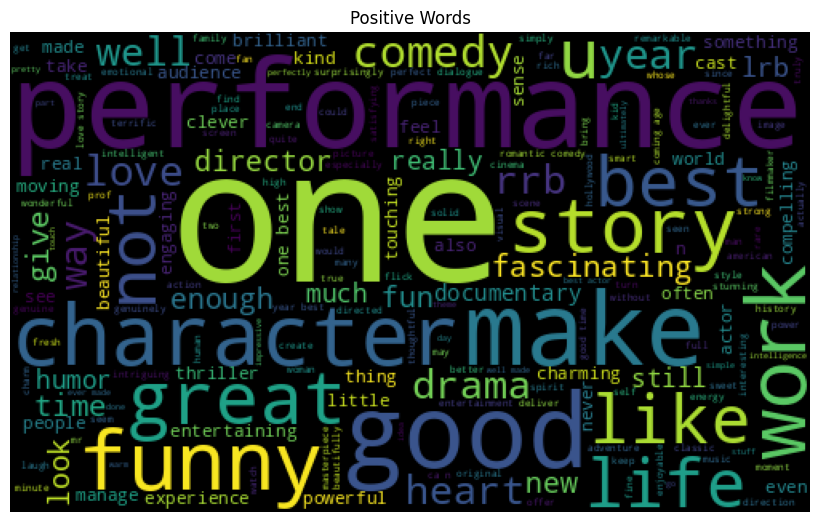

In [ ]:
# Importing WordCloud for visualizing most frequent words
from wordcloud import WordCloud

# Creating a word cloud for positive sentiment phrases
words_list = df[df['Sentiment_phrase']=='positive']['Preprocessed_phrase'].unique().tolist()
positive_words = " ".join(words_list)
print(positive_words)

pos_wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=stop_words).generate(positive_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Positive Words')
plt.show()

would hard time sitting one hard time sitting one aggressive self glorification manipulative whitewash self glorification manipulative whitewash trouble every day plodding mess plodding mess could hate reason hate oedekerk realization childhood dream martial art flick prof sometimes dream youth remain baseball movie try hard mythic hampered paralyzed self indulgent script aim poetry end sounding like satire self indulgent script little sense going avoid almost feel interested entertaining amusing u progression rambling incoherence give new meaning phrase fatal script error progression rambling incoherence give new meaning phrase fatal script error fatal script error tartakovsky team freakish power visual charm five writer slip modern rut narrative banality narrative banality bad sure filmmaker would disagree honestly n see point honestly n see point clunky tv approach thanks largely williams interesting development processed 60 minute rest overexposed waste rest overexposed waste overe

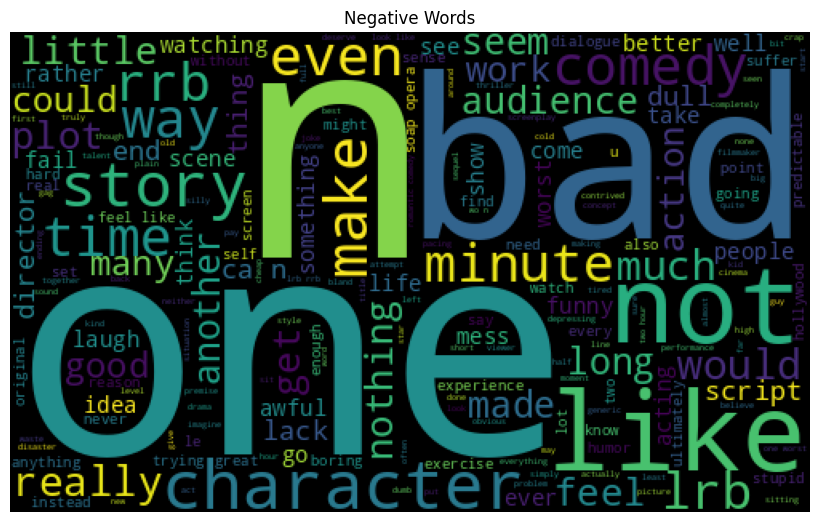

In [ ]:
from wordcloud import WordCloud

# Creating a word cloud for negative sentiment phrases
words_list =df[df['Sentiment_phrase']=='negative']['Preprocessed_phrase'].unique().tolist()
negative_words = " ".join(words_list)
print(negative_words)

pos_wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=stop_words).generate(negative_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Negative Words')
plt.show()

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

train_df = df.copy()
y = train_df['Sentiment'].values
train_df.drop(['Sentiment'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, stratify=y)
#stratify=y here means to have similar distribution of sentiment labels in test and train sets
print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (124848, 5) (124848,)
Test data: (31212, 5) (31212,)


In [ ]:
# Creating a Bag-of-Words (BoW) representation of the text data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_phrase_bow = vectorizer.fit_transform(X_train['Preprocessed_phrase'])
X_test_phrase_bow = vectorizer.transform(X_test['Preprocessed_phrase'])

print('X_train_phrase_bow shape: ', X_train_phrase_bow.shape)
print('X_test_phrase_bow shape: ', X_test_phrase_bow.shape)

X_train_phrase_bow shape:  (124848, 13736)
X_test_phrase_bow shape:  (31212, 13736)


In [ ]:
# Training a Naive Bayes classifier on the BoW representation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_phrase_bow, y_train)

y_pred = clf.predict(X_test_phrase_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6060169165705498


In [ ]:
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, target_names=["neutral","somewhat negative","negative","somewhat positive","positive"]))

                   precision    recall  f1-score   support

          neutral       0.44      0.28      0.34      1414
somewhat negative       0.50      0.40      0.45      5455
         negative       0.68      0.79      0.73     15916
somewhat positive       0.51      0.49      0.50      6586
         positive       0.47      0.28      0.35      1841

         accuracy                           0.61     31212
        macro avg       0.52      0.45      0.47     31212
     weighted avg       0.59      0.61      0.59     31212



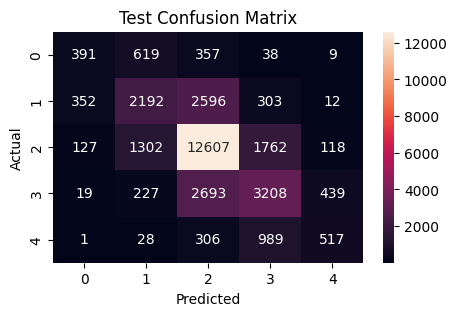

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#term-frequency-inverse document frequency
vectorizer = TfidfVectorizer()

X_train_phrase_tfidf = vectorizer.fit_transform(X_train['Preprocessed_phrase'])
X_test_phrase_tfidf = vectorizer.transform(X_test['Preprocessed_phrase'])

print('X_train_phrase_tfidf shape: ', X_train_phrase_tfidf.shape)
print('X_test_phrase_tfidf shape: ', X_test_phrase_tfidf.shape)

X_train_phrase_tfidf shape:  (124848, 13728)
X_test_phrase_tfidf shape:  (31212, 13728)


In [ ]:
lf = MultinomialNB(alpha=1)
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.5850634371395617


In [ ]:
print(classification_report(y_test, y_pred, target_names=["neutral","somewhat negative","negative","somewhat positive","positive"]))

                   precision    recall  f1-score   support

          neutral       0.61      0.05      0.10      1414
somewhat negative       0.49      0.25      0.33      5455
         negative       0.61      0.89      0.72     15917
somewhat positive       0.53      0.38      0.44      6585
         positive       0.60      0.05      0.09      1841

         accuracy                           0.59     31212
        macro avg       0.57      0.33      0.34     31212
     weighted avg       0.57      0.59      0.53     31212



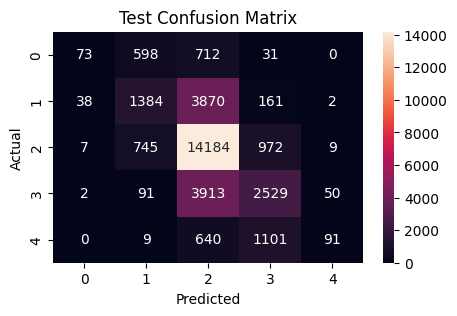

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6230296039984621


In [ ]:
print(classification_report(y_test, y_pred, target_names=["neutral","somewhat negative","negative","somewhat positive","positive"]))

                   precision    recall  f1-score   support

          neutral       0.57      0.18      0.27      1414
somewhat negative       0.51      0.34      0.41      5455
         negative       0.66      0.87      0.75     15917
somewhat positive       0.56      0.45      0.50      6585
         positive       0.57      0.24      0.34      1841

         accuracy                           0.62     31212
        macro avg       0.57      0.42      0.45     31212
     weighted avg       0.60      0.62      0.59     31212



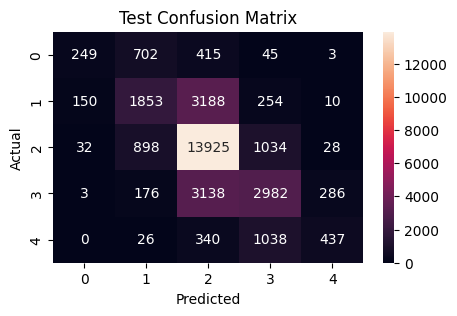

In [ ]:
# Visualizing the confusion matrix for the Logistic Regression model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
